In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import math

In [2]:
#Read the data from .csv file
#dateparse = lambda dates: pd.date(dates, '%Y-%m')

df=pd.read_excel('CDCW_cleaned.xlsx',parse_dates=['Month'], index_col='Month')

In [3]:
df.head()

,Unnamed: 0,Counsellor Name,Course Name,Fees Total,Fees Received,FeesPending
Month,,,,,,
2020-04-01,0,SK,CADM,5000,5000,0
2020-04-01,1,SK,CDCW,7500,7500,0
2020-04-01,2,SK,CDCW,9500,9500,0
2020-04-01,3,IJ,CDCW,9500,9500,0
2020-04-01,4,NC,CDCW,6000,6000,0


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Counsellor Name,Course Name,Fees Total,Fees Received,FeesPending
Month,,,,,
2020-04-01,SK,CADM,5000,5000,0
2020-04-01,SK,CDCW,7500,7500,0
2020-04-01,SK,CDCW,9500,9500,0
2020-04-01,IJ,CDCW,9500,9500,0
2020-04-01,NC,CDCW,6000,6000,0


In [5]:
df.tail()

,Counsellor Name,Course Name,Fees Total,Fees Received,FeesPending
Month,,,,,
2021-07-01,Namarta,CDCW+Creative,20000,15000,5000
2021-07-01,Mehjabee,CDCW,13500,13500,0
2021-07-01,No Counsellor,CDCW,15000,15000,0
2021-07-01,No Counsellor,CDCW,12750,12750,0
2021-07-01,No Counsellor,CDCW,39000,15000,24000


In [6]:
df.shape

(2481, 5)

In [7]:
df.head()

,Counsellor Name,Course Name,Fees Total,Fees Received,FeesPending
Month,,,,,
2020-04-01,SK,CADM,5000,5000,0
2020-04-01,SK,CDCW,7500,7500,0
2020-04-01,SK,CDCW,9500,9500,0
2020-04-01,IJ,CDCW,9500,9500,0
2020-04-01,NC,CDCW,6000,6000,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2481 entries, 2020-04-01 to 2021-07-01
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Counsellor Name  2481 non-null   object
 1   Course Name      2481 non-null   object
 2   Fees Total       2481 non-null   int64 
 3   Fees Received    2481 non-null   int64 
 4   FeesPending      2481 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 116.3+ KB


In [9]:
df.describe(include='all')

,Counsellor Name,Course Name,Fees Total,Fees Received,FeesPending
count,2481,2481,2481.000000,2481.000000,2481.000000
unique,26,168,NaN,NaN,NaN
top,IJ,CDCW,NaN,NaN,NaN
freq,351,1361,NaN,NaN,NaN
mean,NaN,NaN,11601.310762,11170.693672,430.617090
std,NaN,NaN,5999.792873,5826.220120,2256.257212
min,NaN,NaN,999.000000,0.000000,-5500.000000
25%,NaN,NaN,8500.000000,7999.000000,0.000000
50%,NaN,NaN,10500.000000,10000.000000,0.000000
75%,NaN,NaN,12750.000000,12500.000000,0.000000


<AxesSubplot:xlabel='count', ylabel='Counsellor Name'>

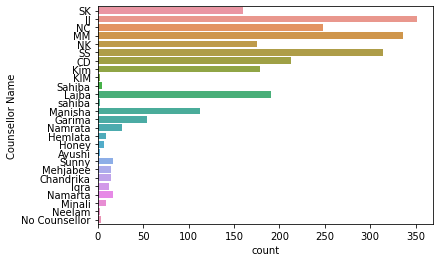

In [10]:
sns.countplot(y='Counsellor Name', data=df)

In [11]:
df[df['Counsellor Name']=='sahiba']

,Counsellor Name,Course Name,Fees Total,Fees Received,FeesPending
Month,,,,,
2021-01-01,sahiba,CDCW,9000,9000,0
2021-01-01,sahiba,CDCW,15000,15000,0


In [12]:
df['Counsellor Name'].replace(to_replace=r'sahiba',value='Sahiba', regex=True,inplace=True)
df

,Counsellor Name,Course Name,Fees Total,Fees Received,FeesPending
Month,,,,,
2020-04-01,SK,CADM,5000,5000,0
2020-04-01,SK,CDCW,7500,7500,0
2020-04-01,SK,CDCW,9500,9500,0
2020-04-01,IJ,CDCW,9500,9500,0
2020-04-01,NC,CDCW,6000,6000,0
...,...,...,...,...,...
2021-07-01,Namarta,CDCW+Creative,20000,15000,5000
2021-07-01,Mehjabee,CDCW,13500,13500,0
2021-07-01,No Counsellor,CDCW,15000,15000,0


In [13]:
df.describe(include='all')

,Counsellor Name,Course Name,Fees Total,Fees Received,FeesPending
count,2481,2481,2481.000000,2481.000000,2481.000000
unique,25,168,NaN,NaN,NaN
top,IJ,CDCW,NaN,NaN,NaN
freq,351,1361,NaN,NaN,NaN
mean,NaN,NaN,11601.310762,11170.693672,430.617090
std,NaN,NaN,5999.792873,5826.220120,2256.257212
min,NaN,NaN,999.000000,0.000000,-5500.000000
25%,NaN,NaN,8500.000000,7999.000000,0.000000
50%,NaN,NaN,10500.000000,10000.000000,0.000000
75%,NaN,NaN,12750.000000,12500.000000,0.000000


In [14]:
totalBy=df.groupby('Counsellor Name')['Fees Total'].sum()

In [15]:
totalBy=pd.DataFrame(data=totalBy)
totalBy=totalBy.reset_index()
totalBy

,Counsellor Name,Fees Total
0,Ayushi,54000
1,CD,2821924
2,Chandrika,284950
3,Garima,713450
4,Hemlata,107550
5,Honey,143399
6,IJ,3696427
7,Iqra,140675
8,KIM,21500
9,Kim,2520693


<AxesSubplot:xlabel='count', ylabel='Counsellor Name'>

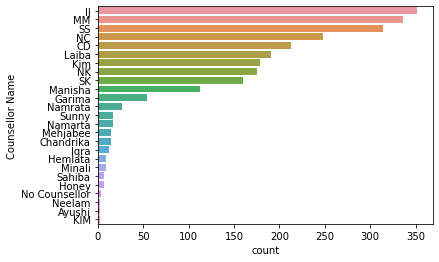

In [16]:
sns.countplot(y='Counsellor Name',order=df['Counsellor Name'].value_counts().index, data=df)

<AxesSubplot:xlabel='Fees Total', ylabel='Counsellor Name'>

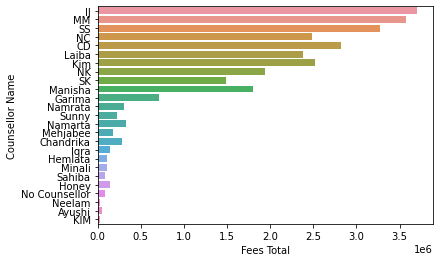

In [17]:
sns.barplot(x='Fees Total',y='Counsellor Name',order=df['Counsellor Name'].value_counts().index,data=totalBy)

In [18]:
totalByMonth=df.groupby('Month')['Fees Total'].sum()
totalByMonth=pd.DataFrame(data=totalByMonth)
totalByMonth=totalByMonth.reset_index()
totalByMonth


,Month,Fees Total
0,2020-04-01,911520
1,2020-05-01,944435
2,2020-06-01,1106672
3,2020-07-01,1269474
4,2020-08-01,1447287
5,2020-09-01,1083710
6,2020-10-01,1361199
7,2020-11-01,1459249
8,2020-12-01,1843178
9,2021-01-01,1615290


<AxesSubplot:xlabel='Fees Total', ylabel='Month'>

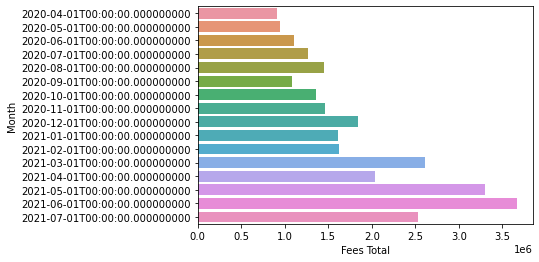

In [19]:
sns.barplot(x='Fees Total',y='Month',data=totalByMonth)

<AxesSubplot:xlabel='Month', ylabel='Fees Total'>

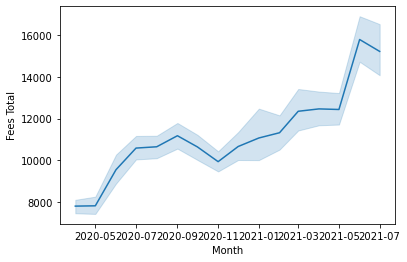

In [20]:
sns.lineplot(x='Month',y='Fees Total',data=df)

In [21]:

#totalByPending=df.groupby('Counsellor Name')['FeesPending'].sum()
#totalByPending=pd.DataFrame(data=totalByPending)
#totalByPending=totalByPending.reset_index()
#totalByPending
#totalByPending.rename({'Counsellor Name': 'CounsellorName'}, axis=1, inplace=True)
#totalByPending
#sns.barplot(x='FeesPending',y='CounsellorName',order=totalByPending.sort_values('FeesPending',ascending=False).CounsellorName,data=totalByPending)


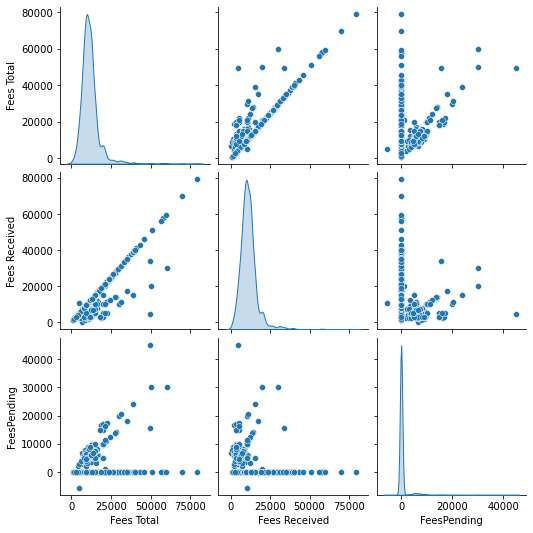

In [22]:
sns.pairplot(df,diag_kind='kde')

In [23]:
corr = df.corr()
corr

,Fees Total,Fees Received,FeesPending
Fees Total,1.000000,0.927615,0.263845
Fees Received,0.927615,1.000000,-0.115554
FeesPending,0.263845,-0.115554,1.000000


<AxesSubplot:>

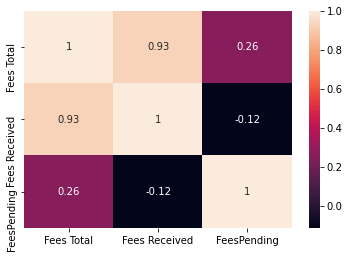

In [24]:
sns.heatmap(corr, annot=True)

In [25]:
pd.pivot_table(df,['Fees Received','Fees Total','FeesPending'], index=['Month'],aggfunc=np.sum)

,Fees Received,Fees Total,FeesPending
Month,,,
2020-04-01,897520,911520,14000
2020-05-01,920085,944435,24350
2020-06-01,1063722,1106672,42950
2020-07-01,1245974,1269474,23500
2020-08-01,1378387,1447287,68900
2020-09-01,1053710,1083710,30000
2020-10-01,1320699,1361199,40500
2020-11-01,1420899,1459249,38350
2020-12-01,1801340,1843178,41838


In [26]:
Sales=pd.pivot_table(df,['Fees Total'], index=['Month'],columns=['Counsellor Name'],aggfunc=np.sum)
Sales

Fees Total                                                   \
Counsellor Name     Ayushi        CD Chandrika    Garima  Hemlata     Honey   
Month                                                                         
2020-04-01             NaN       NaN       NaN       NaN      NaN       NaN   
2020-05-01             NaN       NaN       NaN       NaN      NaN       NaN   
2020-06-01             NaN       NaN       NaN       NaN      NaN       NaN   
2020-07-01             NaN       NaN       NaN       NaN      NaN       NaN   
2020-08-01             NaN       NaN       NaN       NaN      NaN       NaN   
2020-09-01             NaN  241500.0       NaN       NaN      NaN       NaN   
2020-10-01             NaN  336525.0       NaN       NaN      NaN       NaN   
2020-11-01             NaN  335100.0       NaN       NaN      NaN       NaN   
2020-12-01             NaN  306000.0       NaN       NaN      NaN       NaN   
2021-01-01             NaN  272100.0       NaN       NaN      NaN       NaN   
2021-02-01             NaN  223250.0       NaN       NaN      NaN       NaN   
2021-03-01             NaN  350550.0       NaN   19500.0      NaN       NaN   
2021-04-01             NaN   22999.0       NaN   65250.0      NaN       NaN   
2021-05-01             NaN  210200.0       NaN  269750.0  24000.0       NaN   
2021-06-01         54000.0  523700.0       NaN  144500.0  83550.0  108900.0   
2021-07-01             NaN       NaN  284950.0  214450.0      NaN   34499.0   

                                                        ...            \
Counsellor Name        IJ      Iqra      KIM       Kim  ...        NC   
Month                                                   ...             
2020-04-01       199000.0       NaN      NaN       NaN  ...  153000.0   
2020-05-01       166100.0       NaN      NaN       NaN  ...  221125.0   
2020-06-01       219500.0       NaN      NaN       NaN  ...  172450.0   
2020-07-01       250625.0       NaN      NaN       NaN  ...  172000.0   
2020-08-01       220500.0       NaN      NaN       NaN  ...  218007.0   
2020-09-01        61300.0       NaN      NaN       NaN  ...   88875.0   
2020-10-01       230175.0       NaN      NaN       NaN  ...  207250.0   
2020-11-01       295375.0       NaN  21500.0   61000.0  ...  212750.0   
2020-12-01       240000.0       NaN      NaN  247696.0  ...   50250.0   
2021-01-01        89050.0       NaN      NaN  188525.0  ...  249000.0   
2021-02-01       264400.0       NaN      NaN  261640.0  ...   78250.0   
2021-03-01       388305.0       NaN      NaN  267652.0  ...  216150.0   
2021-04-01       287275.0       NaN      NaN  349682.0  ...  156350.0   
2021-05-01       453272.0       NaN      NaN  354825.0  ...  202125.0   
2021-06-01       331550.0       NaN      NaN  437674.0  ...   89545.0   
2021-07-01            NaN  140675.0      NaN  351999.0  ...       NaN   

                                                                      \
Counsellor Name        NK   Namarta   Namrata   Neelam No Counsellor   
Month                                                                  
2020-04-01       175100.0       NaN       NaN      NaN           NaN   
2020-05-01       235475.0       NaN       NaN      NaN           NaN   
2020-06-01       221425.0       NaN       NaN      NaN           NaN   
2020-07-01       205474.0       NaN       NaN      NaN           NaN   
2020-08-01       230575.0       NaN       NaN      NaN           NaN   
2020-09-01       195425.0       NaN       NaN      NaN           NaN   
2020-10-01       112525.0       NaN       NaN      NaN           NaN   
2020-11-01       170025.0       NaN       NaN      NaN           NaN   
2020-12-01       296095.0       NaN       NaN      NaN           NaN   
2021-01-01        97950.0       NaN       NaN      NaN           NaN   
2021-02-01            NaN       NaN       NaN      NaN           NaN   
2021-03-01            NaN       NaN       NaN      NaN           NaN   
2021-04-01            NaN       NaN       NaN 

In [27]:
Sales.loc['Total']= Sales.sum()
Sales

Fees Total                                           \
Counsellor Name         Ayushi         CD Chandrika    Garima   Hemlata   
Month                                                                     
2020-04-01 00:00:00        NaN        NaN       NaN       NaN       NaN   
2020-05-01 00:00:00        NaN        NaN       NaN       NaN       NaN   
2020-06-01 00:00:00        NaN        NaN       NaN       NaN       NaN   
2020-07-01 00:00:00        NaN        NaN       NaN       NaN       NaN   
2020-08-01 00:00:00        NaN        NaN       NaN       NaN       NaN   
2020-09-01 00:00:00        NaN   241500.0       NaN       NaN       NaN   
2020-10-01 00:00:00        NaN   336525.0       NaN       NaN       NaN   
2020-11-01 00:00:00        NaN   335100.0       NaN       NaN       NaN   
2020-12-01 00:00:00        NaN   306000.0       NaN       NaN       NaN   
2021-01-01 00:00:00        NaN   272100.0       NaN       NaN       NaN   
2021-02-01 00:00:00        NaN   223250.0       NaN       NaN       NaN   
2021-03-01 00:00:00        NaN   350550.0       NaN   19500.0       NaN   
2021-04-01 00:00:00        NaN    22999.0       NaN   65250.0       NaN   
2021-05-01 00:00:00        NaN   210200.0       NaN  269750.0   24000.0   
2021-06-01 00:00:00    54000.0   523700.0       NaN  144500.0   83550.0   
2021-07-01 00:00:00        NaN        NaN  284950.0  214450.0       NaN   
Total                  54000.0  2821924.0  284950.0  713450.0  107550.0   

                                                                        ...  \
Counsellor Name         Honey         IJ      Iqra      KIM        Kim  ...   
Month                                                                   ...   
2020-04-01 00:00:00       NaN   199000.0       NaN      NaN        NaN  ...   
2020-05-01 00:00:00       NaN   166100.0       NaN      NaN        NaN  ...   
2020-06-01 00:00:00       NaN   219500.0       NaN      NaN        NaN  ...   
2020-07-01 00:00:00       NaN   250625.0       NaN      NaN        NaN  ...   
2020-08-01 00:00:00       NaN   220500.0       NaN      NaN        NaN  ...   
2020-09-01 00:00:00       NaN    61300.0       NaN      NaN        NaN  ...   
2020-10-01 00:00:00       NaN   230175.0       NaN      NaN        NaN  ...   
2020-11-01 00:00:00       NaN   295375.0       NaN  21500.0    61000.0  ...   
2020-12-01 00:00:00       NaN   240000.0       NaN      NaN   247696.0  ...   
2021-01-01 00:00:00       NaN    89050.0       NaN      NaN   188525.0  ...   
2021-02-01 00:00:00       NaN   264400.0       NaN      NaN   261640.0  ...   
2021-03-01 00:00:00       NaN   388305.0       NaN      NaN   267652.0  ...   
2021-04-01 00:00:00       NaN   287275.0       NaN      NaN   349682.0  ...   
2021-05-01 00:00:00       NaN   453272.0       NaN      NaN   354825.0  ...   
2021-06-01 00:00:00  108900.0   331550.0       NaN      NaN   437674.0  ...   
2021-07-01 00:00:00   34499.0        NaN  140675.0      NaN   351999.0  ...   
Total                143399.0  3696427.0  140675.0  21500.0  2520693.0  ...   

                                                                        \
Counsellor Name             NC         NK   Namarta   Namrata   Neelam   
Month                                                                    
2020-04-01 00:00:00   153000.0   175100.0       NaN       NaN      NaN   
2020-05-01 00:00:00   221125.0   235475.0       NaN       NaN      NaN   
2020-06-01 00:00:00   172450.0   221425.0       NaN       NaN      NaN   
2020-07-01 00:00:00   172000.0   205474.0       NaN       NaN      NaN   
2020-08-01 00:00:00   218007.0   230575.0       NaN       NaN      NaN   
2020-09-01 00:00:00    88875.0   195425.0       NaN       NaN      NaN   
2020-10-01 00:00:00   207250.0   112525.0       NaN       NaN      NaN   
2020-11-01 00:00:00   212750.0   170025.0       NaN       NaN      NaN   
2020-12-01 00:00:00    50250.0   296095.0       NaN       NaN      NaN   
2021-01-01 00:00:00   249000.0    97950.0       Na

In [28]:
Sales = Sales.sort_values(by = 'Total', axis = 1,ascending=False)
Sales

Fees Total                                              \
Counsellor Name             IJ         MM         SS         CD        Kim   
Month                                                                        
2020-04-01 00:00:00   199000.0   183420.0        NaN        NaN        NaN   
2020-05-01 00:00:00   166100.0   127235.0    19000.0        NaN        NaN   
2020-06-01 00:00:00   219500.0   257647.0    69650.0        NaN        NaN   
2020-07-01 00:00:00   250625.0   225750.0   153625.0        NaN        NaN   
2020-08-01 00:00:00   220500.0   297461.0   205120.0        NaN        NaN   
2020-09-01 00:00:00    61300.0   208991.0   133619.0   241500.0        NaN   
2020-10-01 00:00:00   230175.0   165675.0   211550.0   336525.0        NaN   
2020-11-01 00:00:00   295375.0   158425.0   162574.0   335100.0    61000.0   
2020-12-01 00:00:00   240000.0   310362.0   281775.0   306000.0   247696.0   
2021-01-01 00:00:00    89050.0   244365.0   273500.0   272100.0   188525.0   
2021-02-01 00:00:00   264400.0    95249.0   240319.0   223250.0   261640.0   
2021-03-01 00:00:00   388305.0   319571.0   333697.0   350550.0   267652.0   
2021-04-01 00:00:00   287275.0   150047.0   299443.0    22999.0   349682.0   
2021-05-01 00:00:00   453272.0   430642.0   504279.0   210200.0   354825.0   
2021-06-01 00:00:00   331550.0   395633.0   383750.0   523700.0   437674.0   
2021-07-01 00:00:00        NaN        NaN        NaN        NaN   351999.0   
Total                3696427.0  3570473.0  3271901.0  2821924.0  2520693.0   

                                                                            \
Counsellor Name             NC      Laiba         NK    Manisha         SK   
Month                                                                        
2020-04-01 00:00:00   153000.0        NaN   175100.0        NaN   201000.0   
2020-05-01 00:00:00   221125.0        NaN   235475.0        NaN   175500.0   
2020-06-01 00:00:00   172450.0        NaN   221425.0        NaN   166000.0   
2020-07-01 00:00:00   172000.0        NaN   205474.0        NaN   262000.0   
2020-08-01 00:00:00   218007.0        NaN   230575.0        NaN   275624.0   
2020-09-01 00:00:00    88875.0        NaN   195425.0        NaN   154000.0   
2020-10-01 00:00:00   207250.0        NaN   112525.0        NaN    97499.0   
2020-11-01 00:00:00   212750.0        NaN   170025.0        NaN    42500.0   
2020-12-01 00:00:00    50250.0        NaN   296095.0        NaN   111000.0   
2021-01-01 00:00:00   249000.0   150800.0    97950.0        NaN        NaN   
2021-02-01 00:00:00    78250.0   276600.0        NaN   141500.0        NaN   
2021-03-01 00:00:00   216150.0   469825.0        NaN   240000.0        NaN   
2021-04-01 00:00:00   156350.0   413125.0        NaN   287000.0        NaN   
2021-05-01 00:00:00   202125.0   343675.0        NaN   459000.0        NaN   
2021-06-01 00:00:00    89545.0   372800.0        NaN   472725.0        NaN   
2021-07-01 00:00:00        NaN   355300.0        NaN   200250.0        NaN   
Total                2487127.0  2382125.0  1940069.0  1800475.0  1485123.0   

                     ...                                                    \
Counsellor Name      ...  Mehjabee     Honey      Iqra    Minali   Hemlata   
Month                ...                                                     
2020-04-01 00:00:00  ...       NaN       NaN       NaN       NaN       NaN   
2020-05-01 00:00:00  ...       NaN       NaN       NaN       NaN       NaN   
2020-06-01 00:00:00  ...       NaN       NaN       NaN       NaN       NaN   
2020-07-01 00:00:00  ...       NaN       NaN       NaN       NaN       NaN   
2020-08-01 00:00:00  ...       NaN       NaN       NaN       NaN       NaN   
2020-09-01 00:00:00  ...       NaN       NaN       NaN       NaN       NaN   
2020-10-01 00:00:00  ...       NaN       NaN       NaN       NaN       NaN   
2020-11-01 00:00:00  ...       NaN       NaN       NaN       NaN       NaN   
2020-12-01 00:00:00  ...       NaN      

In [29]:
Sales["Total Sales"] = Sales.sum(axis=1)
Sales

Fees Total                                              \
Counsellor Name             IJ         MM         SS         CD        Kim   
Month                                                                        
2020-04-01 00:00:00   199000.0   183420.0        NaN        NaN        NaN   
2020-05-01 00:00:00   166100.0   127235.0    19000.0        NaN        NaN   
2020-06-01 00:00:00   219500.0   257647.0    69650.0        NaN        NaN   
2020-07-01 00:00:00   250625.0   225750.0   153625.0        NaN        NaN   
2020-08-01 00:00:00   220500.0   297461.0   205120.0        NaN        NaN   
2020-09-01 00:00:00    61300.0   208991.0   133619.0   241500.0        NaN   
2020-10-01 00:00:00   230175.0   165675.0   211550.0   336525.0        NaN   
2020-11-01 00:00:00   295375.0   158425.0   162574.0   335100.0    61000.0   
2020-12-01 00:00:00   240000.0   310362.0   281775.0   306000.0   247696.0   
2021-01-01 00:00:00    89050.0   244365.0   273500.0   272100.0   188525.0   
2021-02-01 00:00:00   264400.0    95249.0   240319.0   223250.0   261640.0   
2021-03-01 00:00:00   388305.0   319571.0   333697.0   350550.0   267652.0   
2021-04-01 00:00:00   287275.0   150047.0   299443.0    22999.0   349682.0   
2021-05-01 00:00:00   453272.0   430642.0   504279.0   210200.0   354825.0   
2021-06-01 00:00:00   331550.0   395633.0   383750.0   523700.0   437674.0   
2021-07-01 00:00:00        NaN        NaN        NaN        NaN   351999.0   
Total                3696427.0  3570473.0  3271901.0  2821924.0  2520693.0   

                                                                            \
Counsellor Name             NC      Laiba         NK    Manisha         SK   
Month                                                                        
2020-04-01 00:00:00   153000.0        NaN   175100.0        NaN   201000.0   
2020-05-01 00:00:00   221125.0        NaN   235475.0        NaN   175500.0   
2020-06-01 00:00:00   172450.0        NaN   221425.0        NaN   166000.0   
2020-07-01 00:00:00   172000.0        NaN   205474.0        NaN   262000.0   
2020-08-01 00:00:00   218007.0        NaN   230575.0        NaN   275624.0   
2020-09-01 00:00:00    88875.0        NaN   195425.0        NaN   154000.0   
2020-10-01 00:00:00   207250.0        NaN   112525.0        NaN    97499.0   
2020-11-01 00:00:00   212750.0        NaN   170025.0        NaN    42500.0   
2020-12-01 00:00:00    50250.0        NaN   296095.0        NaN   111000.0   
2021-01-01 00:00:00   249000.0   150800.0    97950.0        NaN        NaN   
2021-02-01 00:00:00    78250.0   276600.0        NaN   141500.0        NaN   
2021-03-01 00:00:00   216150.0   469825.0        NaN   240000.0        NaN   
2021-04-01 00:00:00   156350.0   413125.0        NaN   287000.0        NaN   
2021-05-01 00:00:00   202125.0   343675.0        NaN   459000.0        NaN   
2021-06-01 00:00:00    89545.0   372800.0        NaN   472725.0        NaN   
2021-07-01 00:00:00        NaN   355300.0        NaN   200250.0        NaN   
Total                2487127.0  2382125.0  1940069.0  1800475.0  1485123.0   

                     ...                                                   \
Counsellor Name      ...     Honey      Iqra    Minali   Hemlata   Sahiba   
Month                ...                                                    
2020-04-01 00:00:00  ...       NaN       NaN       NaN       NaN      NaN   
2020-05-01 00:00:00  ...       NaN       NaN       NaN       NaN      NaN   
2020-06-01 00:00:00  ...       NaN       NaN       NaN       NaN      NaN   
2020-07-01 00:00:00  ...       NaN       NaN       NaN       NaN      NaN   
2020-08-01 00:00:00  ...       NaN       NaN       NaN       NaN      NaN   
2020-09-01 00:00:00  ...       NaN       NaN       NaN       NaN      NaN   
2020-10-01 00:00:00  ...       NaN       NaN       NaN       NaN      NaN   
2020-11-01 00:00:00  ...       NaN       NaN       NaN       NaN      NaN   
2020-12-01 00:00:00  ...       NaN       NaN       

In [30]:
Sales = Sales.sort_values(by = 'Total', axis = 1,ascending=False)
Sales

Total Sales Fees Total                                   \
Counsellor Name                         IJ         MM         SS         CD   
Month                                                                         
2020-04-01 00:00:00    911520.0   199000.0   183420.0        NaN        NaN   
2020-05-01 00:00:00    944435.0   166100.0   127235.0    19000.0        NaN   
2020-06-01 00:00:00   1106672.0   219500.0   257647.0    69650.0        NaN   
2020-07-01 00:00:00   1269474.0   250625.0   225750.0   153625.0        NaN   
2020-08-01 00:00:00   1447287.0   220500.0   297461.0   205120.0        NaN   
2020-09-01 00:00:00   1083710.0    61300.0   208991.0   133619.0   241500.0   
2020-10-01 00:00:00   1361199.0   230175.0   165675.0   211550.0   336525.0   
2020-11-01 00:00:00   1459249.0   295375.0   158425.0   162574.0   335100.0   
2020-12-01 00:00:00   1843178.0   240000.0   310362.0   281775.0   306000.0   
2021-01-01 00:00:00   1615290.0    89050.0   244365.0   273500.0   272100.0   
2021-02-01 00:00:00   1618208.0   264400.0    95249.0   240319.0   223250.0   
2021-03-01 00:00:00   2605250.0   388305.0   319571.0   333697.0   350550.0   
2021-04-01 00:00:00   2031171.0   287275.0   150047.0   299443.0    22999.0   
2021-05-01 00:00:00   3294768.0   453272.0   430642.0   504279.0   210200.0   
2021-06-01 00:00:00   3664337.0   331550.0   395633.0   383750.0   523700.0   
2021-07-01 00:00:00   2527104.0        NaN        NaN        NaN        NaN   
Total                28782852.0  3696427.0  3570473.0  3271901.0  2821924.0   

                                                                            \
Counsellor Name            Kim         NC      Laiba         NK    Manisha   
Month                                                                        
2020-04-01 00:00:00        NaN   153000.0        NaN   175100.0        NaN   
2020-05-01 00:00:00        NaN   221125.0        NaN   235475.0        NaN   
2020-06-01 00:00:00        NaN   172450.0        NaN   221425.0        NaN   
2020-07-01 00:00:00        NaN   172000.0        NaN   205474.0        NaN   
2020-08-01 00:00:00        NaN   218007.0        NaN   230575.0        NaN   
2020-09-01 00:00:00        NaN    88875.0        NaN   195425.0        NaN   
2020-10-01 00:00:00        NaN   207250.0        NaN   112525.0        NaN   
2020-11-01 00:00:00    61000.0   212750.0        NaN   170025.0        NaN   
2020-12-01 00:00:00   247696.0    50250.0        NaN   296095.0        NaN   
2021-01-01 00:00:00   188525.0   249000.0   150800.0    97950.0        NaN   
2021-02-01 00:00:00   261640.0    78250.0   276600.0        NaN   141500.0   
2021-03-01 00:00:00   267652.0   216150.0   469825.0        NaN   240000.0   
2021-04-01 00:00:00   349682.0   156350.0   413125.0        NaN   287000.0   
2021-05-01 00:00:00   354825.0   202125.0   343675.0        NaN   459000.0   
2021-06-01 00:00:00   437674.0    89545.0   372800.0        NaN   472725.0   
2021-07-01 00:00:00   351999.0        NaN   355300.0        NaN   200250.0   
Total                2520693.0  2487127.0  2382125.0  1940069.0  1800475.0   

                     ...                                                    \
Counsellor Name      ...  Mehjabee     Honey      Iqra    Minali   Hemlata   
Month                ...                                                     
2020-04-01 00:00:00  ...       NaN       NaN       NaN       NaN       NaN   
2020-05-01 00:00:00  ...       NaN       NaN       NaN       NaN       NaN   
2020-06-01 00:00:00  ...       NaN       NaN       NaN       NaN       NaN   
2020-07-01 00:00:00  ...       NaN       NaN       NaN       NaN       NaN   
2020-08-01 00:00:00  ...       NaN       NaN       NaN       NaN       NaN   
2020-09-01 00:00:00  ...       NaN       NaN       NaN       NaN       NaN   
2020-10-01 00:00:00  ...       NaN       NaN       NaN       NaN       NaN   
2020-11-01 00:00:00  ...       NaN       NaN       NaN       NaN       NaN   
2020-12-01 00:00:00 

In [31]:
Sales.to_excel("CDCW_sales.xlsx")

# Forecasting

In [32]:
totalByMonth=df.groupby('Month')['Fees Total'].sum()
totalByMonth=pd.DataFrame(data=totalByMonth)
#totalByMonth=totalByMonth.reset_index()
df=totalByMonth
df

,Fees Total
Month,
2020-04-01,911520
2020-05-01,944435
2020-06-01,1106672
2020-07-01,1269474
2020-08-01,1447287
2020-09-01,1083710
2020-10-01,1361199
2020-11-01,1459249
2020-12-01,1843178


<AxesSubplot:xlabel='Month'>

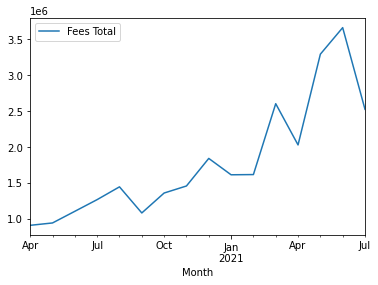

In [33]:
df.plot()

In [36]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'pmdarima'

In [37]:
stepwise_fit = auto_arima(df['Avg'], trace = True, supress_warnings = True)

NameError: name 'auto_arima' is not defined

In [35]:
!pip install pmdarima

  Using cached pmdarima-1.8.2-cp38-cp38-win_amd64.whl (596 kB)
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy-1.20.2.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.2
    Uninstalling numpy-1.20.2:


In [39]:
conda install -c prath pmdarima 

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - pmdarima

Current channels:

  - https://conda.anaconda.org/prath/win-64
  - https://conda.anaconda.org/prath/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed



Examining python=3.8:  80%|########  | 4/5 [00:00<00:00,  6.49it/s]          
                                                                   

Examining conflict for pmdarima python:   0%|          | 0/5 [00:00<?, ?it/s]
                                                                             

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - pmdarima -> python[version='>=3.6,<3.7.0a0|>=3.7,<3.8.0a0']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.





## Testing For Stationarity

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
test_result=adfuller(df['Fees Total'])

In [36]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [37]:
adfuller_test(df['Fees Total'])

ADF Test Statistic : 2.829338533235939
p-value : 1.0
#Lags Used : 5
Number of Observations Used : 10
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing

In [38]:
df['Fees Total Difference'] = df['Fees Total'] - df['Fees Total'].shift(1)

In [39]:
df.head()

,Fees Total,Fees Total Difference
Month,,
2020-04-01,911520,NaN
2020-05-01,944435,32915.0
2020-06-01,1106672,162237.0
2020-07-01,1269474,162802.0
2020-08-01,1447287,177813.0


In [40]:
## Again test dickey fuller test
adfuller_test(df['Fees Total Difference'].dropna())

ADF Test Statistic : 1.0416738847644171
p-value : 0.9946867632170464
#Lags Used : 5
Number of Observations Used : 9
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:xlabel='Month'>

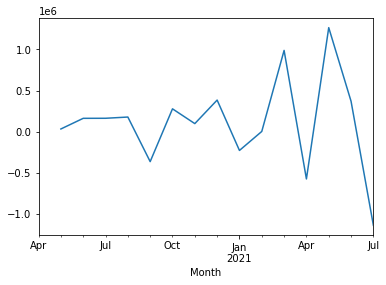

In [41]:
df['Fees Total Difference'].plot()

In [42]:
df['Fees Total Difference2'] = df['Fees Total Difference'] - df['Fees Total Difference'].shift(1)

In [43]:
## Again test dickey fuller test
adfuller_test(df['Fees Total Difference2'].dropna())

ADF Test Statistic : -3.38572174558974
p-value : 0.011455353972495577
#Lags Used : 3
Number of Observations Used : 10
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [44]:
df.head()

,Fees Total,Fees Total Difference,Fees Total Difference2
Month,,,
2020-04-01,911520,NaN,NaN
2020-05-01,944435,32915.0,NaN
2020-06-01,1106672,162237.0,129322.0
2020-07-01,1269474,162802.0,565.0
2020-08-01,1447287,177813.0,15011.0


<AxesSubplot:xlabel='Month'>

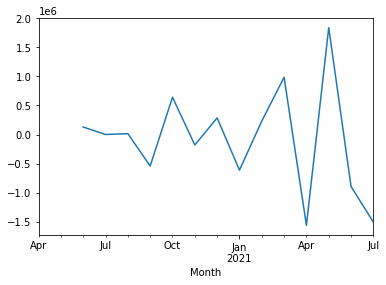

In [45]:
df['Fees Total Difference2'].plot()

In [46]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

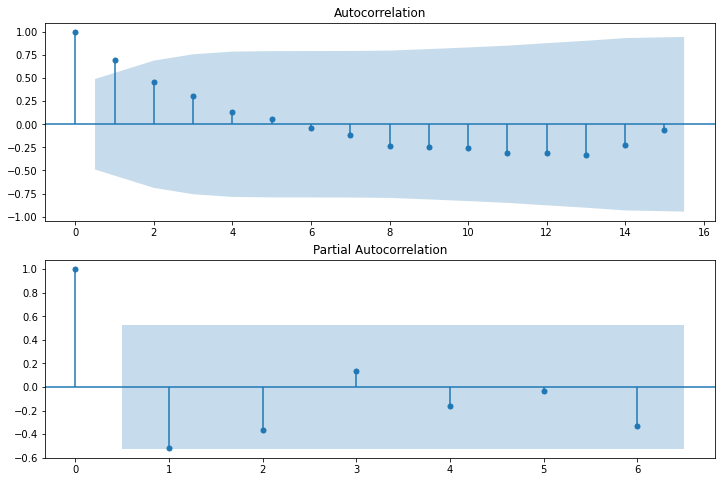

In [47]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Fees Total'].dropna(),lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Fees Total Difference2'].dropna(),lags=6,ax=ax2)

In [48]:
# For non-seasonal data
#p=1, d=2, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [61]:
model=ARIMA(df['Fees Total'],order=(0,2,1))
model_fit=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [60]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D2.Fees Total   No. Observations:                   14
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -211.605
Method:                           css   S.D. of innovations         887094.862
Date:                Sun, 01 Aug 2021   AIC                            427.210
Time:                        22:57:50   BIC                            428.488
Sample:                    06-01-2020   HQIC                           427.092
                         - 07-01-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.358e+04   2.37e+05     -0.353      0.724   -5.48e+05    3.81e+05
==============================================================================
"""

<AxesSubplot:xlabel='Month'>

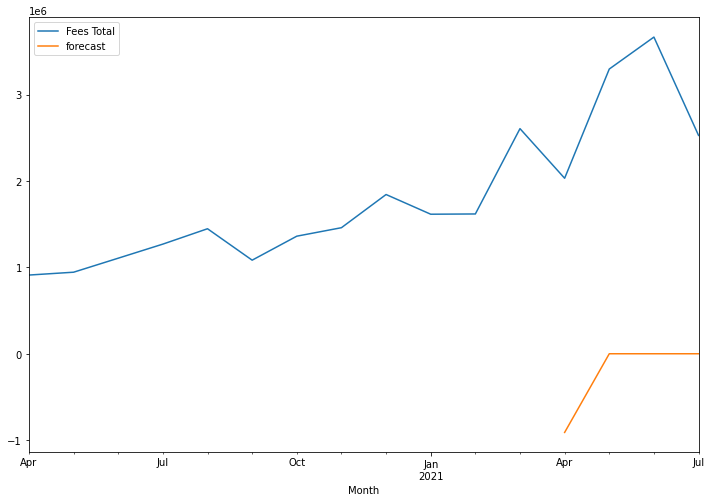

In [51]:
df['forecast']=model_fit.predict(start=12,end=16,dynamic=True)
df[['Fees Total','forecast']].plot(figsize=(12,8))

In [52]:
model=sm.tsa.statespace.SARIMAX(df['Fees Total'],order=(0, 2, 1),seasonal_order=(0,2,1,3))
results=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<AxesSubplot:xlabel='Month'>

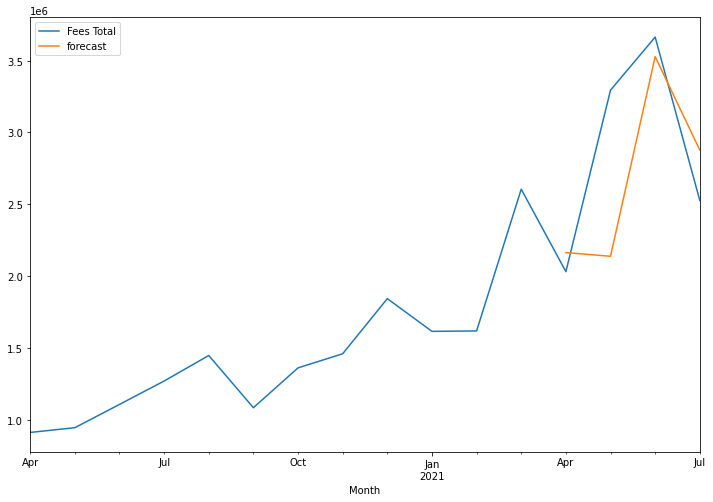

In [53]:

df['forecast']=results.predict(start=12,end=16,dynamic=True)
df[['Fees Total','forecast']].plot(figsize=(12,8))

In [54]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,4)]

In [55]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [56]:
future_datest_df.tail()

,Fees Total,Fees Total Difference,Fees Total Difference2,forecast
2021-08-01,NaN,NaN,NaN,NaN
2021-09-01,NaN,NaN,NaN,NaN
2021-10-01,NaN,NaN,NaN,NaN


In [57]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

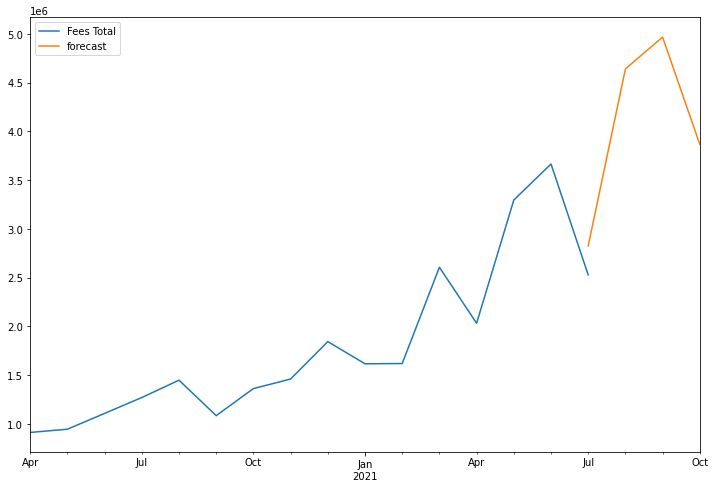

In [58]:
future_df['forecast'] = results.predict(start = 15, end = 20, dynamic= True)  
future_df[['Fees Total', 'forecast']].plot(figsize=(12, 8))